# Solutions

In [5]:
import numpy as np
import matplotlib.pyplot as plt

:::{solution} exercise_2_6
:::

The updated code is:


In [13]:
x = np.zeros(5)

x[0] = 10
print("x:", x)

for i in range(5):
    x[i+1] = x[i] + 0.1*x[i] 
    
print("x:", x)

x: [ 10.          11.          12.1         13.31        14.641
  16.1051     -25.28       -22.72       -15.104       -2.944
  12.2368      28.0064      41.32864     49.0496      48.504832
  38.150144    18.0944896   -9.5911936  -40.89577472 -70.28211712]


If we try and run this we see `IndexError: index 5 is out of bounds for axis 0 with size 5`. 

When we increase the upper limit to $5$ the final value that is passed through the for loop is `i = 4`.
Remember that arrays are indexed from $0$, so `x[n]` will try to access the (n+1)th element of `x`.  

So when `i = 4` the line `x[i+1] = x[i] + 0.1*x[i]` looks for the element of `x` at index $5$, which is the _$6$th_ element of `x`. 
But `x` only has $5$ elements! So Python is warning us that we are trying to access an element of an array that does not exist - i.e. it is **out of bounds**.

:::{solution} exercise_2_7
:::

First we need to extend the for loop from above. To get $x_{16}$ we will need to calculate 17 terms of the sequence - remember that the first term is $x_0$.

In [6]:
x = np.zeros(17)

x[0] = 10

for i in range(16):
    x[i+1] = x[i] + 0.1*x[i] 
    
print("x[16]:", x[16]) 

x[16]: 45.94972986357215


:::{solution} exercise_2_8
:::

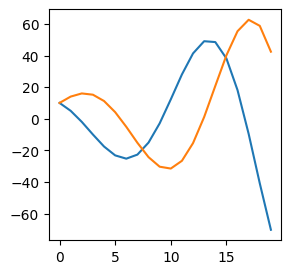

In [7]:
x = np.zeros(20)
x[0] = 10

# create array y and set initial value
y = np.zeros(20)
y[0] = 10

for i in range(19):
    x[i+1] = x[i] - 0.5 * y[i]  

    # set value of y[i+1]
    y[i+1] = y[i] + 0.4 * x[i]

plt.figure(figsize=(3,3))
plt.plot(x)

# plot y on the SAME graph
plt.plot(y)

:::{solution} exercise_2_9
:::

- $I_0 = 1000$
- $I_1 = I_0 - 0.1*I_0 = 1000 - 100 = 900$
- $I_2 = I_1 - 0.1*I_1 = 900 - 90 = 810$
- $I_3 = I_2 - 0.1*I_2 = 810 - 81 = 729$
and so on...


Text(0, 0.5, 'Infected population')

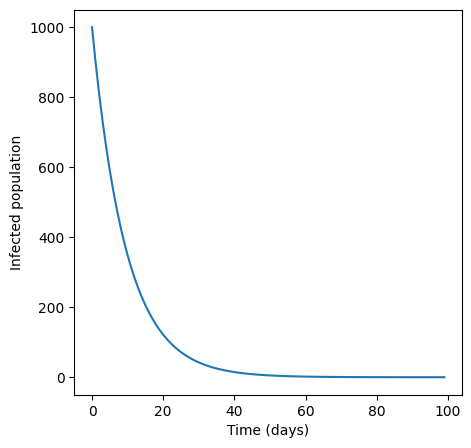

In [8]:
n_days = 100

I = np.zeros(n_days)

I[0] = 1000

for i in range(n_days - 1):
    I[i+1] = I[i] - 0.1 * I[i]

plt.figure(figsize=(5,5))
plt.plot(I)
plt.xlabel("Time (days)")
plt.ylabel("Infected population")

:::{solution} exercise_2_10
:::


Text(0, 0.5, 'Population')

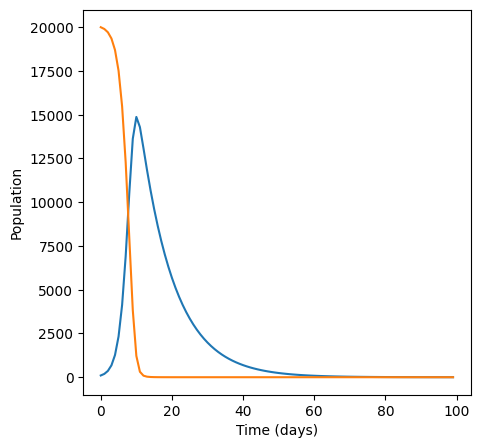

In [9]:
# set up variables and arrays
n_days = 100
a = 0.1
b = 0.00005
S = np.zeros(n_days)
I = np.zeros(n_days)

# initialise the variables
S[0] = 20000
I[0] = 100

# implement equations
for i in range(n_days - 1):
    S[i+1] = S[i] - (b * S[i] * I[i])
    I[i+1] = I[i] + (b * S[i] * I[i]) - (a * I[i])

plt.figure(figsize=(5,5))
plt.plot(I)
plt.plot(S)
plt.xlabel("Time (days)")
plt.ylabel("Population")

:::{solution} exercise_2_11
:::g

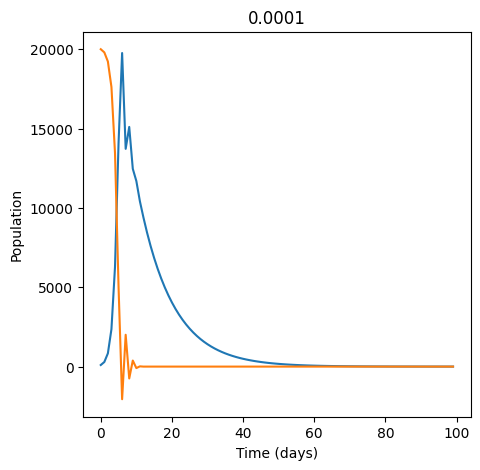

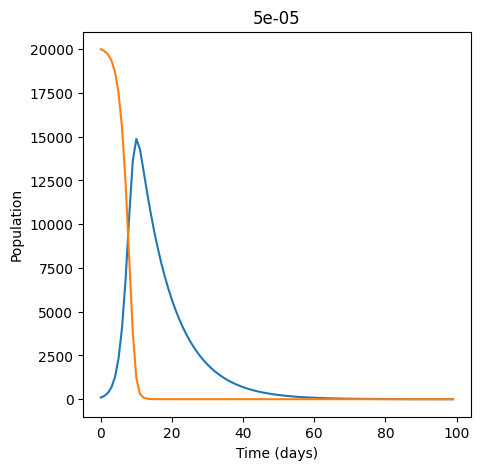

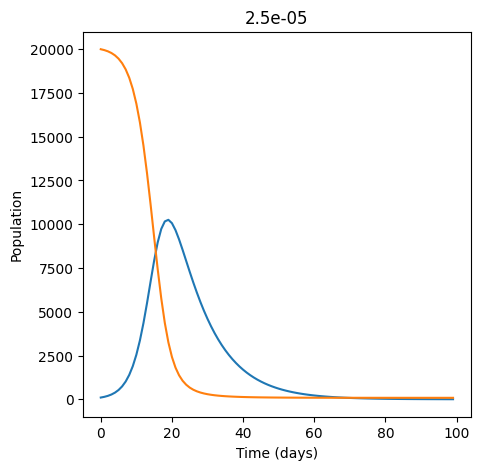

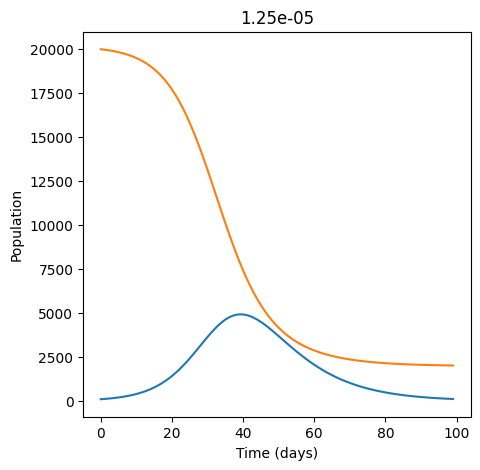

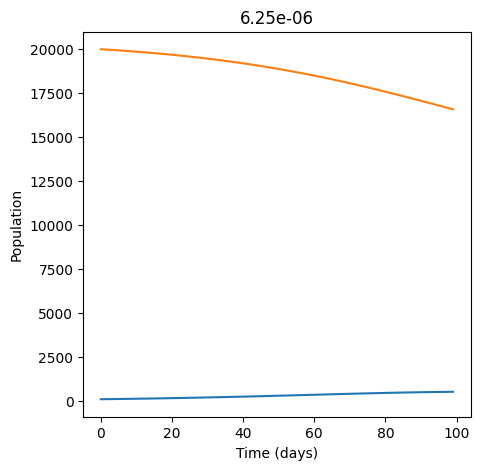

In [11]:

    # set up variables and arrays
    n_days = 100
    a = 0.1
    b = 0.0001/(2**i)
    S = np.zeros(n_days)
    I = np.zeros(n_days)

    # initialise the variables
    S[0] = 20000
    I[0] = 100

    # implement equations
    for i in range(n_days - 1):
        S[i+1] = S[i] - (b * S[i] * I[i])
        I[i+1] = I[i] + (b * S[i] * I[i]) - (a * I[i])

    plt.figure(figsize=(5,5))
    plt.plot(I)
    plt.plot(S)
    plt.xlabel("Time (days)")
    plt.ylabel("Population")
    plt.title(b) # add title so we know what value we are currently looking at

We can see in the first graph that the infection peaks a lot earlier - after about 5 days. Notice that there is a small oscillation to a negative susceptible population size, before stabilising - this is because the program doesn't know that population size can't be negative (the model doesn't reflect this either!). We could adapt the code to reflect this, if we wanted to. 

At $b = 2.5e-05$ the infection peaks at around $10,000$ people. Halving again, we see a peak at $5,000$, but there are never more infected people that susceptible. In the final graph, when $b = 6.25e-06$ the number of infected people never peaks - there is no epidemic. So the minimum value of $b$ that results in an epidemic lies somewhere in the interval $(6.25e-06, 1.25e-05) = (0.00000625, 0.0000125)$.

To estimate the minimum value that results in an epidemic, let's use `np.linspace` to test some values in that interval.

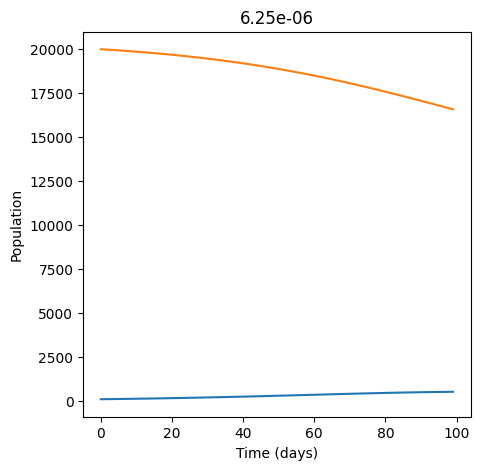

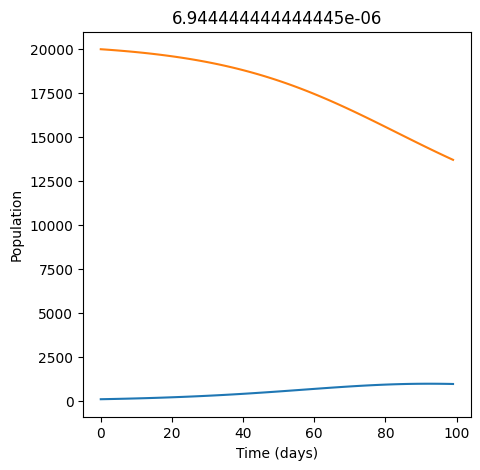

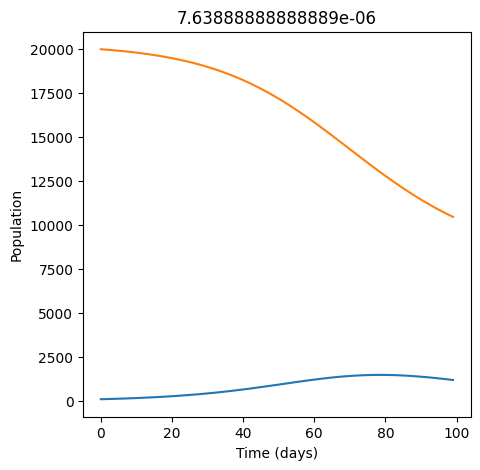

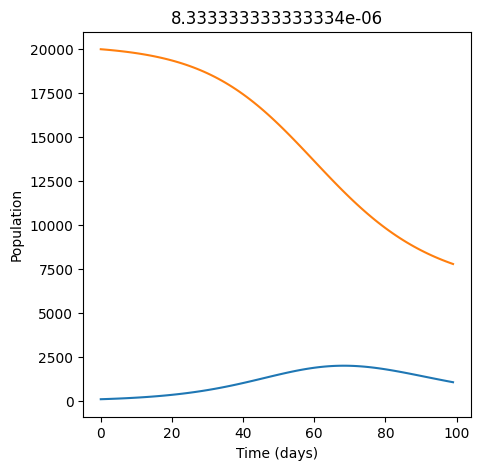

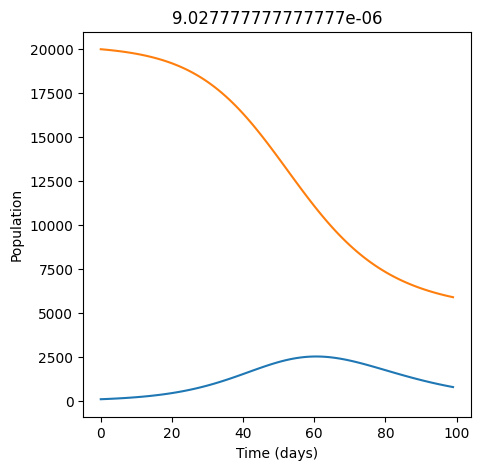

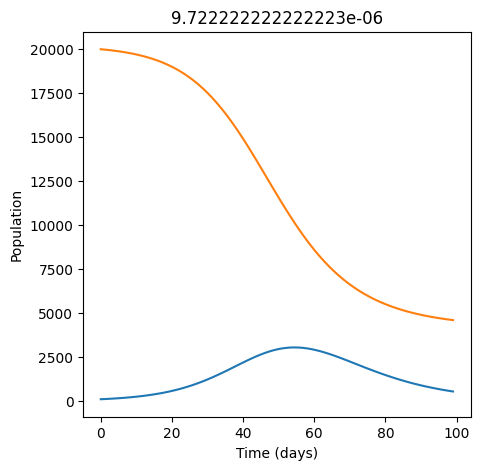

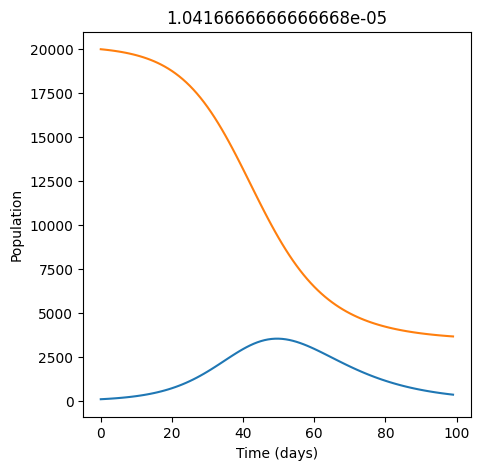

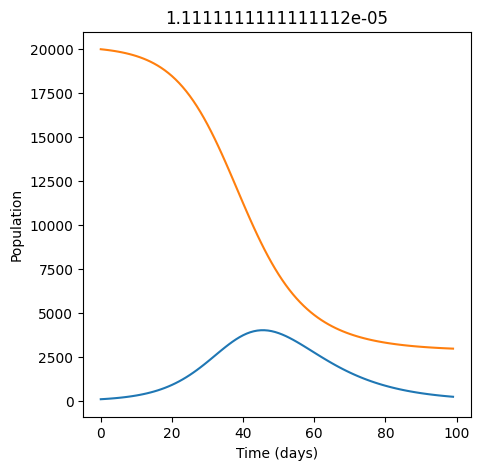

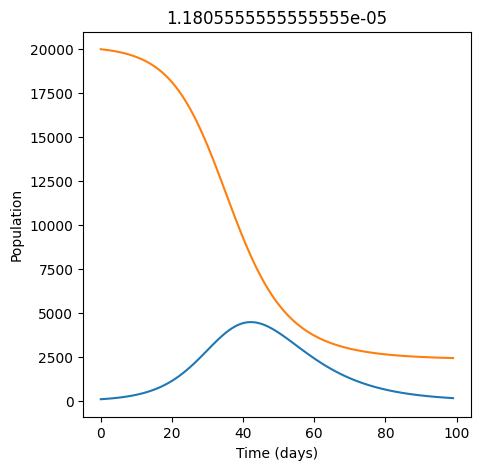

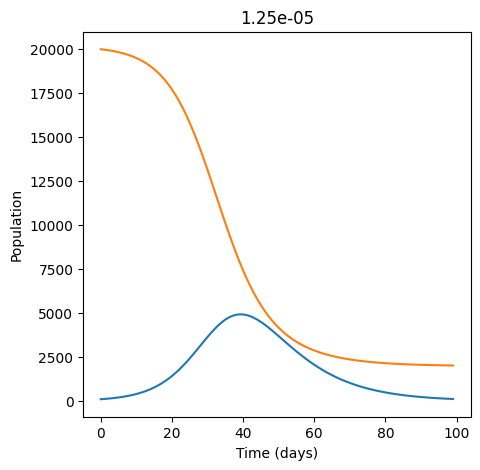

In [12]:
for b in np.linspace(0.00000625, 0.0000125, 10):
    # set up variables and arrays
    n_days = 100
    a = 0.1
    S = np.zeros(n_days)
    I = np.zeros(n_days)

    # initialise the variables
    S[0] = 20000
    I[0] = 100

    # implement equations
    for i in range(n_days - 1):
        S[i+1] = S[i] - (b * S[i] * I[i])
        I[i+1] = I[i] + (b * S[i] * I[i]) - (a * I[i])

    plt.figure(figsize=(5,5))
    plt.plot(I)
    plt.plot(S)
    plt.xlabel("Time (days)")
    plt.ylabel("Population")
    plt.title(b) # add title so we know what value we are currently looking at

Examining the graphs, the second graph doesn't seem to have a peak, but the third graph arguably has a *tiny* peak. We can go back to python to find out what these values are.

In [10]:
print('The minimum value of b that results in an epidemic lies in the interval (', np.linspace(0.00000625, 0.0000125, 10)[1], ', ', np.linspace(0.00000625, 0.0000125, 10)[2], ').')

The minimum value of b that results in an epidemic lies in the interval ( 6.944444444444445e-06 ,  7.63888888888889e-06 ).


-12.352732188134505

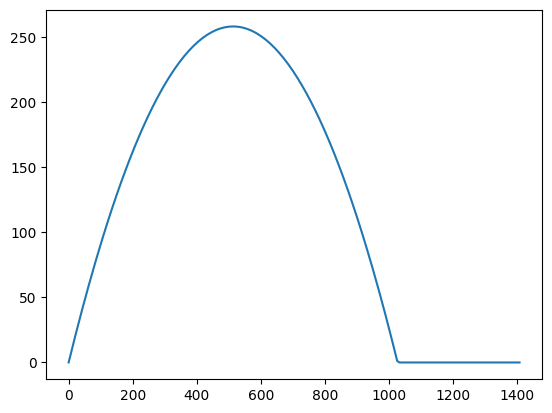

In [36]:
# set up variables and arrays
n = 200
g = 9.81
dt = .1

theta = np.pi / 4
s = 100


x = np.zeros(n)
y = np.zeros(n)
u = np.zeros(n)
v = np.zeros(n)

# initialise the variables
u[0] = np.cos(theta) * s
v[0] = np.sin(theta) * s

# implement equations
for i in range(n - 1):
    x[i+1] = x[i] + u[i] * dt
    y[i+1] = max(y[i] + v[i] * dt, 0)
    z = y[i] + v[i] * dt
    u[i+1] = u[i]
    v[i+1] = v[i] - g * dt

plt.plot(x, y)

np.max(z, 0)